In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
rcParams['figure.figsize'] = 10, 6

In [6]:
df = pd.read_csv('AirPassengers.csv')

In [9]:
df.Month = pd.to_datetime(df.Month)

In [11]:
indexDf = df.set_index(['Month'])

In [57]:
indexDf.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


c:\program files\python36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


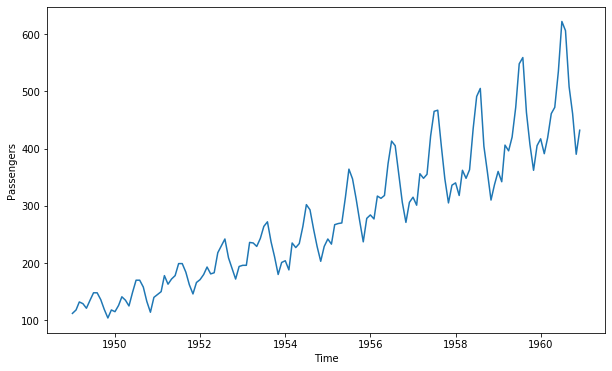

In [12]:
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.plot(indexDf)

In [13]:
rolmean = indexDf.rolling(12).mean()
rolstd = indexDf.rolling(12).std()

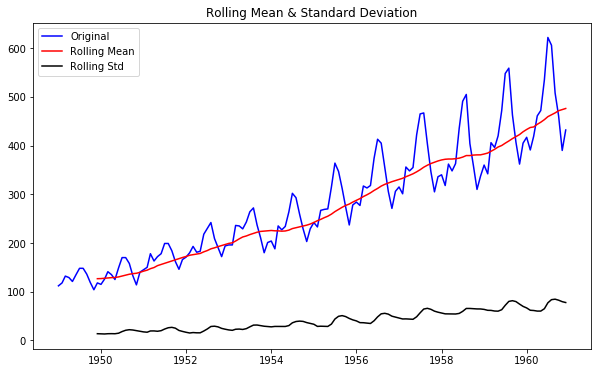

In [14]:
orig = plt.plot(indexDf, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [16]:
dftest = adfuller(indexDf['#Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

In [17]:
print(dfoutput)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


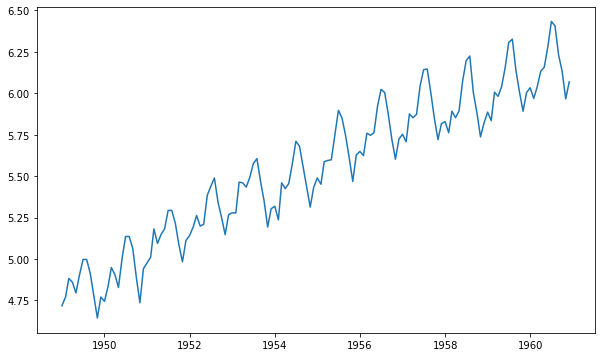

In [18]:
indexDf_log = np.log(indexDf)
plt.plot(indexDf_log)

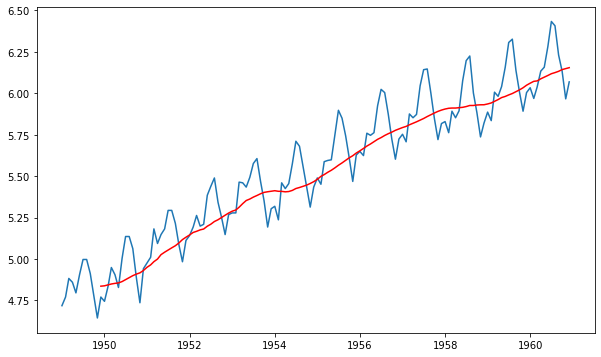

In [19]:
movingAverage = indexDf_log.rolling(window=12).mean()
movingSTD = indexDf.rolling(window=12).std()
plt.plot(indexDf_log)
plt.plot(movingAverage, color='red')

In [20]:
dfWOTrend = indexDf_log - movingAverage
dfWOTrend.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [21]:
dfWOTrend.dropna(inplace=True)

In [22]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

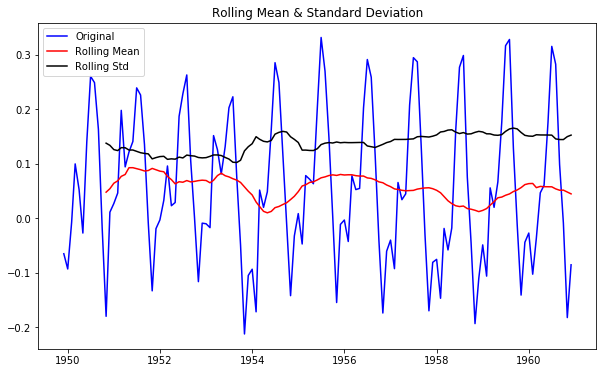

Results of Dickey Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [23]:
test_stationarity(dfWOTrend)

In [24]:
exponentialDecayWeightedAvg = indexDf_log.ewm(halflife = 12,min_periods=0, adjust=True).mean()

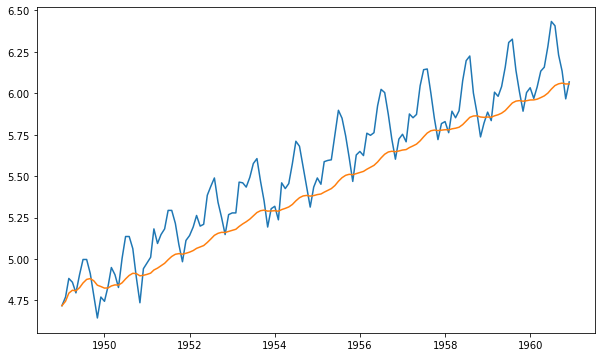

In [25]:
plt.plot(indexDf_log)
plt.plot(exponentialDecayWeightedAvg)

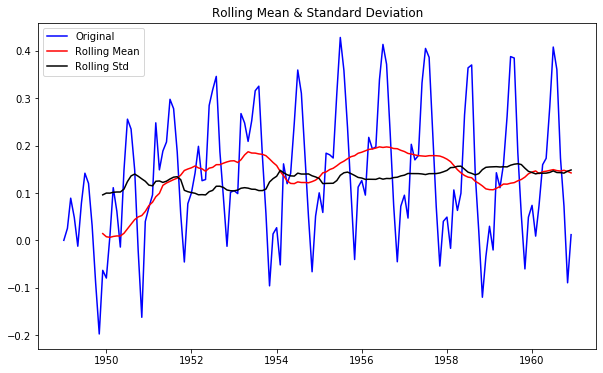

Results of Dickey Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [26]:
indexDflogminusEMA = indexDf_log - exponentialDecayWeightedAvg
test_stationarity(indexDflogminusEMA)

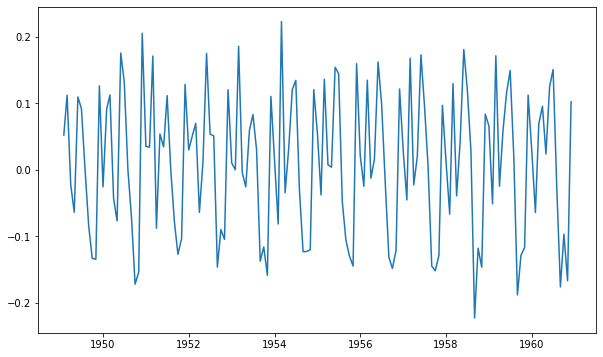

In [27]:
dfLogDiffShifting = indexDf_log - indexDf_log.shift()
plt.plot(dfLogDiffShifting)

In [28]:
dfLogDiffShifting.dropna(inplace=True)

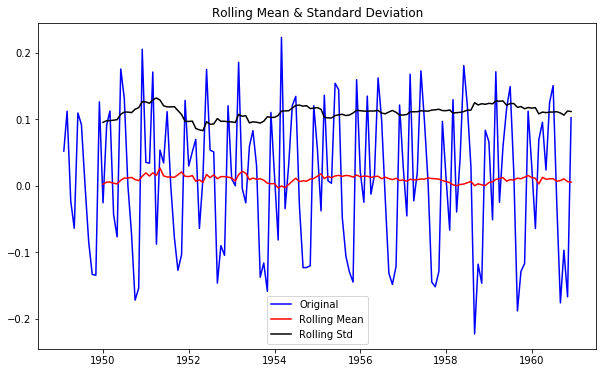

Results of Dickey Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [29]:
test_stationarity(dfLogDiffShifting)

After implementing 3 methods for making the series stationary, log shifting will be used because of its very low p-value and simplicity because it can be transformed back to its original form pretty seriously.

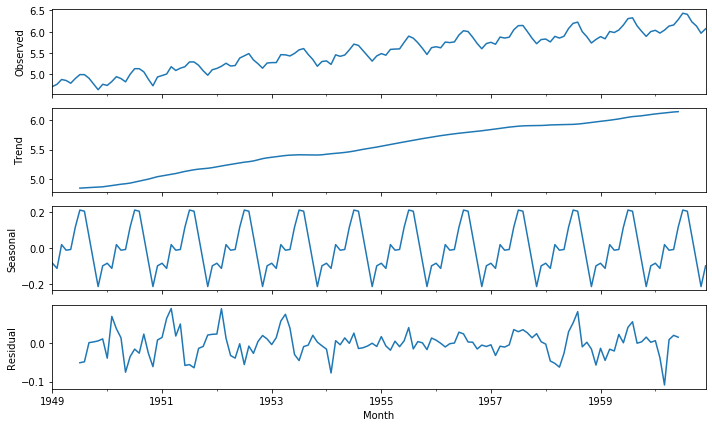

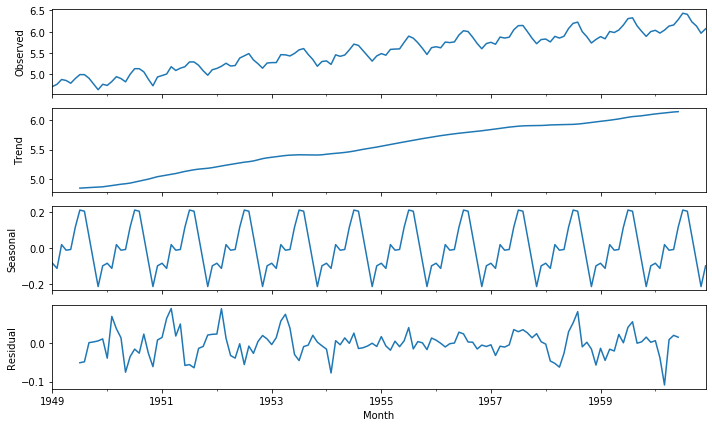

In [33]:
decomposition = seasonal_decompose(indexDf_log)
decomposition.plot()
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

# plt.subplot(411)
# plt.plot(indexDf_log, label= 'Original')
# plt.legend(loc='best')

# plt.subplot(412)
# plt.plot(trend, label='Trend')
# plt.legend(loc='best')

# plt.subplot(413)
# plt.plot(seasonal, label='Seasonality')
# plt.legend(loc='best')

# plt.subplot(414)
# plt.plot(residual, label='Residuals')
# plt.legend(loc='best')


c:\program files\python36\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


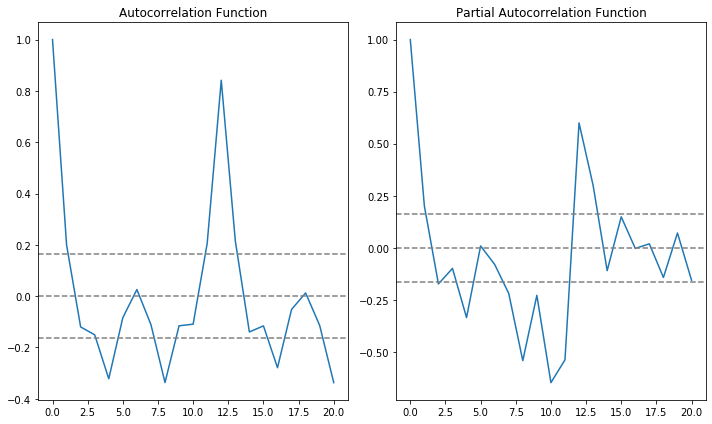

In [35]:
lag_acf = acf(dfLogDiffShifting, nlags=20)
lag_pacf = pacf(dfLogDiffShifting, nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dfLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dfLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')         

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dfLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dfLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

# AR Model

c:\program files\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\program files\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, "Text(0.5, 1.0, 'RSS: 1.5023')")

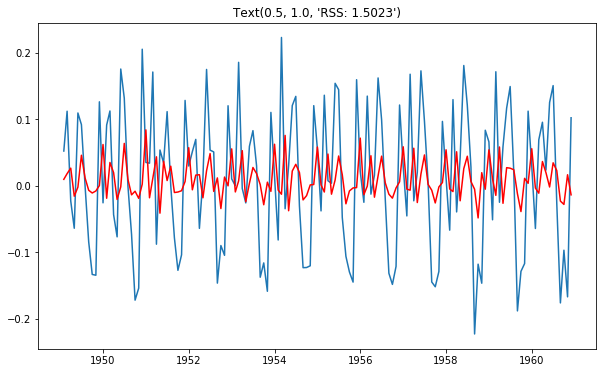

In [37]:
model = ARIMA(indexDf_log, order = (2,1,0))
results_AR = model.fit(disp=1)
plt.plot(dfLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title(plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - dfLogDiffShifting['#Passengers'])**2)))

# MA Model

c:\program files\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\program files\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA model


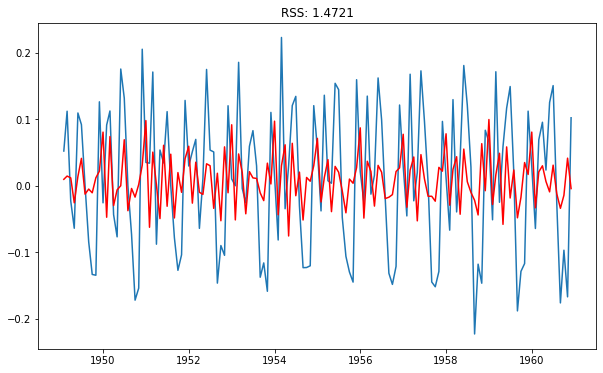

In [39]:
model = ARIMA(indexDf_log, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(dfLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - dfLogDiffShifting['#Passengers'])**2))
print('Plotting MA model')

# AR + I + MA = ARIMA Model

c:\program files\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\program files\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


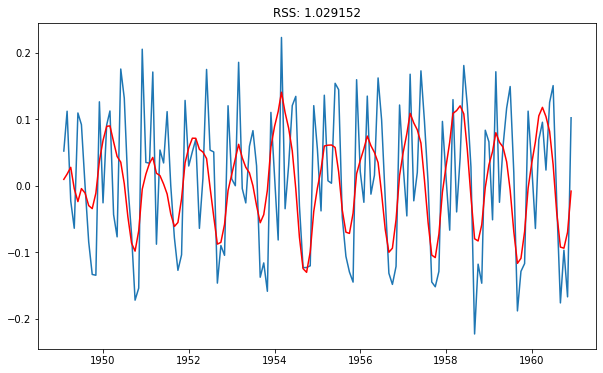

In [42]:
model = ARIMA(indexDf_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dfLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %4f'%sum((results_ARIMA.fittedvalues - dfLogDiffShifting['#Passengers'])**2))
print('Plotting ARIMA model')

In [43]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [44]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
1949-07-01    0.021984
1949-08-01    0.011007
1949-09-01   -0.018922
1949-10-01   -0.053389
1949-11-01   -0.064668
1949-12-01   -0.027456
1950-01-01    0.040679
1950-02-01    0.130113
1950-03-01    0.220142
1950-04-01    0.286294
1950-05-01    0.330347
1950-06-01    0.365815
1950-07-01    0.368915
1950-08-01    0.321788
1950-09-01    0.235435
1950-10-01    0.136970
1950-11-01    0.069123
1950-12-01    0.063896
1951-01-01    0.081281
1951-02-01    0.115296
1951-03-01    0.157858
1951-04-01    0.176605
1951-05-01    0.191865
1951-06-01    0.194354
1951-07-01    0.181946
                ...   
1958-07-01    1.166556
1958-08-01    1.150090
1958-09-01    1.070248
1958-10-01    0.987105
1958-11-01    0.928236
1958-12-01    0.925573
1959-01-01    0.956772
1959-02-01    1.008218
1959-03-01    1.088024
1959-04-01    1.153358
1959-05-01    1.211548
1959-06-01    1.247623
1959-

In [47]:
predictions_ARIMA_log = pd.Series(indexDf_log['#Passengers'].iloc[0], index=indexDf.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

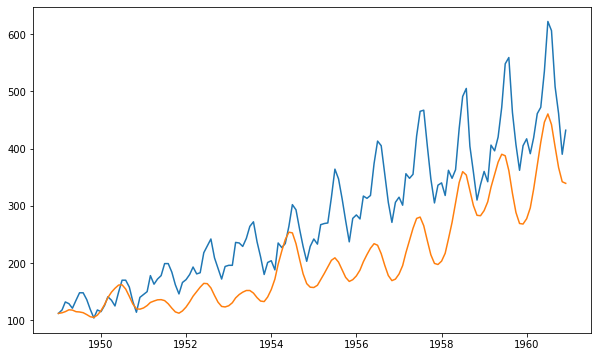

In [49]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexDf)
plt.plot(predictions_ARIMA)

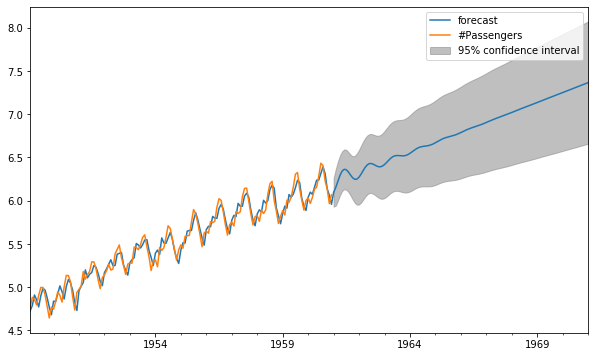

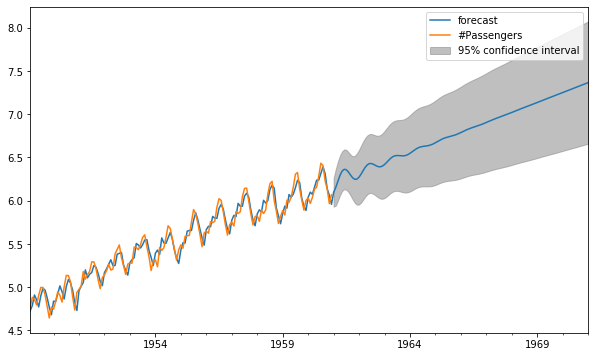

In [50]:
results_ARIMA.plot_predict(1,264) 

# Holt's Trend Method

In [51]:
from statsmodels.tsa.api import Holt

In [66]:
HoltPred = Holt(indexDf_log).fit(smoothing_level=0.8134, smoothing_slope=0.0001)

c:\program files\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.776331')

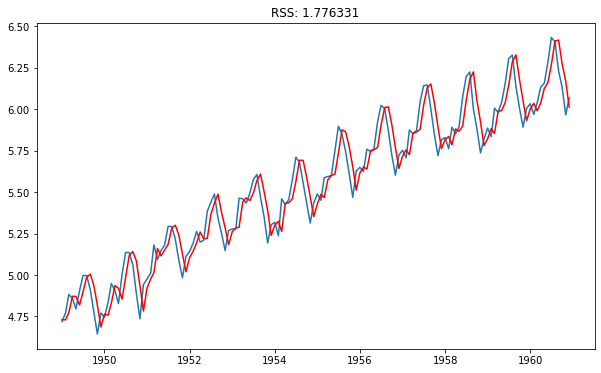

In [67]:
plt.plot(indexDf_log)
plt.plot(HoltPred.fittedvalues, color = 'red')
plt.title('RSS: %4f'%sum((HoltPred.fittedvalues - indexDf_log['#Passengers'])**2))

In [68]:
Plot_Forecast = HoltPred.predict(1,264)

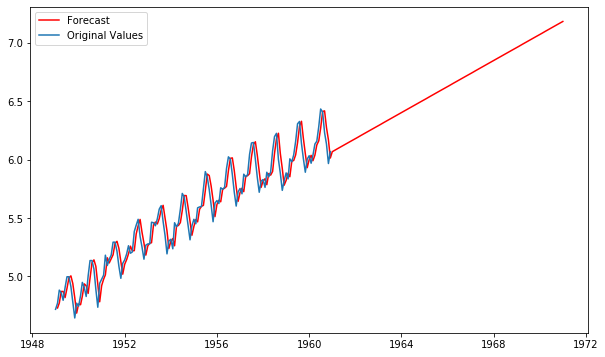

In [70]:
plt.plot(Plot_Forecast, label = 'Forecast', color = 'red')
plt.plot(indexDf_log, label= 'Original Values')
plt.legend(loc = 'best')